there was some problem in the intermediate step, we took average of flux values. During data procesing steps, we took average of fluxx values. even in case of upper and lower limis. it has altered the distribution of chandra x-ray fluxes. We must better try with the original unmodified version

## Import Modules

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

## Create new dataset

In [39]:
#ch.to_csv('../not_on_git/mw_cat/chandra_all_sources_v2.csv')
ch = (
        pd.read_csv('../not_on_git/mw_cat/chandra_all_sources_v2.csv', index_col='name')
        #.query("extent_flag==0 and streak_src_flag==0 and pileup_flag==0 and conf_flag==0 and sat_src_flag==0")
        .drop(columns = ['conf_flag','extent_flag', 'sat_src_flag','err_ellipse_r0', 'err_ellipse_r1','dither_warning_flag', 'pileup_flag', 'streak_src_flag',])
    )
#ch.columns.to_list()
significance = 0
ch = ch[ch['significance']>significance]
ch


/home/kumaran/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ra,dec,significance,gal_l,gal_b,likelihood,var_flag,var_inter_hard_flag,flux_aper_b,flux_aper_lolim_b,...,var_inter_hard_prob_hs,hard_ms,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b
name,,,,,,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,3.294118,304.096050,-43.644346,20.474157222655503,0,0,0.000000e+00,0.000000e+00,...,NaN,-0.307308,NaN,0.0,0.252877,0.726962,0.872329,NaN,NaN,NaN
2CXO J003936.7-731249,9.903193,-73.213742,4.157895,304.116127,-43.887309,42.24479575565441,0,0,1.458552e-14,9.410013e-15,...,NaN,-0.368520,NaN,0.0,0.474083,0.704944,0.324659,NaN,NaN,NaN
2CXO J004028.7-731106,10.119748,-73.185171,14.422175,304.031850,-43.919668,754.1935755697684,0,0,1.094959e-13,9.974688e-14,...,NaN,0.064959,NaN,0.0,0.180151,0.708192,0.247447,NaN,NaN,NaN
2CXO J004501.0-730958,11.254322,-73.166239,15.667675,303.577560,-43.953962,815.5999217200681,0,0,6.496416e-14,6.058919e-14,...,NaN,0.356027,NaN,0.0,0.108335,0.614935,0.759819,NaN,NaN,NaN
2CXO J004506.3-730056,11.276413,-73.015666,10.447263,303.575841,-44.104667,279.52923592257525,0,0,2.379848e-14,1.967851e-14,...,NaN,0.042473,NaN,0.0,0.154119,0.836030,0.810222,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,331.557273,-49.957521,4.057143,345.582863,-51.190099,26.1448,0,1,3.452933e-14,2.257687e-14,...,0.123393,0.233604,0.988921,0.0,0.178982,0.472714,0.611808,0.0,0.428810,3.002890e-06
2CXO J220614.6-500951,331.560853,-50.164421,3.885714,345.272648,-51.119708,42.7619,0,1,7.855447e-15,4.909654e-15,...,0.009072,-0.999375,0.716291,1.0,0.592450,0.918676,0.787411,5.0,0.831532,4.978411e-06
2CXO J220618.4-500554,331.577082,-50.098537,4.457143,345.365084,-51.152644,70.2839,0,1,2.417635e-14,1.845038e-14,...,0.453884,-0.417239,0.887843,1.0,0.609084,0.919050,0.660959,0.0,0.002736,1.087005e-08


In [40]:
flags = (
    pd.read_csv('flags/chandra_all_flags.csv' , index_col='name')
    #.query("extent_flag==0 and streak_src_flag==0 and pileup_flag==0 and conf_flag==0 and sat_src_flag==0")
)
flags

,ra,dec,conf_flag,significance,extent_flag,sat_src_flag,gal_l,gal_b,var_flag,pileup_flag,streak_src_flag
name,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,0.0,3.294118,0,0.0,304.096050,-43.644346,0.0,0.0,0
2CXO J003936.7-731249,9.903193,-73.213742,0.0,4.157895,0,0.0,304.116127,-43.887309,0.0,0.0,0
2CXO J004028.7-731106,10.119748,-73.185171,0.0,14.422175,0,0.0,304.031850,-43.919668,0.0,0.0,0
2CXO J004501.0-730958,11.254322,-73.166239,0.0,15.667675,1,0.0,303.577560,-43.953962,0.0,0.0,0
2CXO J004506.3-730056,11.276413,-73.015666,0.0,10.447263,0,0.0,303.575841,-44.104667,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,331.557273,-49.957521,0.0,4.057143,0,0.0,345.582863,-51.190099,0.0,0.0,0
2CXO J220614.6-500951,331.560853,-50.164421,0.0,3.885714,0,0.0,345.272648,-51.119708,0.0,0.0,0
2CXO J220618.4-500554,331.577082,-50.098537,0.0,4.457143,0,0.0,345.365084,-51.152644,0.0,0.0,0


In [44]:
t =  [1 if el[-1]=='X' else 0 for el in flags.index.to_list()]
sum(t)

1299

In [ ]:
offset = 1.01
ch_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')[['class','offset']]
ch_id =ch_id[ch_id['offset']<offset]
ch = pd.merge(ch_id , ch , left_index=True , right_index =True , how='right')
ch 

In [26]:
print(ch.columns.to_list())

['ra', 'dec', 'conf_flag', 'significance', 'extent_flag', 'sat_src_flag', 'gal_l', 'gal_b', 'err_ellipse_r0', 'err_ellipse_r1', 'likelihood', 'dither_warning_flag', 'pileup_flag', 'streak_src_flag', 'var_flag', 'var_inter_hard_flag', 'flux_aper_b', 'flux_aper_lolim_b', 'flux_aper_hilim_b', 'flux_aper_h', 'flux_aper_lolim_h', 'flux_aper_hilim_h', 'flux_aper_m', 'flux_aper_lolim_m', 'flux_aper_hilim_m', 'flux_aper_s', 'flux_aper_lolim_s', 'flux_aper_hilim_s', 'flux_aper_u', 'flux_aper_lolim_u', 'flux_aper_hilim_u', 'hard_hm', 'var_inter_hard_prob_hm', 'var_inter_hard_sigma_hm', 'hard_hs', 'var_inter_hard_prob_hs', 'hard_ms', 'var_inter_hard_prob_ms', 'var_intra_index_b', 'var_intra_prob_b', 'ks_intra_prob_b', 'kp_intra_prob_b', 'var_inter_index_b', 'var_inter_prob_b', 'var_inter_sigma_b']


In [ ]:
{
    "flux_aper_h" : "h-csc" , 
    "flux_aper_m" : "m-csc" , 
    "flux_aper_s" : "s-csc" , 
    "flux_aper_b" : "b-csc"
}
[]

In [119]:
# DO NOT RUN
ch = pd.read_csv('compiled_data_v3/x_phot.csv' , index_col='name')
ch_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
ch.insert(0 , 'class' , ch_id['class'].to_list())
ch.insert(1 , 'offset' , ch_id['offset'].to_list())
ch.insert(2 , 'significance' , ch_id['significance'].to_list())
#ch = ch[ch['offset']<1.01]
#ch = ch[ch['significance']>3]
ch 

,class,offset,significance,gal_b2,gal_l2,hard_hs,hard_hm,hard_ms,var_inter_prob_b,var_inter_sigma_b,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,CV,0.000218,3.428571,-44.891974,305.906836,-0.792005,-0.058713,-0.733292,0.263263,5.507693e-07,...,11.940199,1.095149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,CV,0.000230,64.727180,-11.955034,338.169913,-0.961899,-0.803248,-0.694566,1.000000,1.093973e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,CV,0.000235,6.103520,-44.875913,305.885422,-0.182386,0.089944,-0.266084,0.999984,6.639804e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,CV,0.000313,13.755014,-44.866347,305.879929,-0.092442,0.292317,-0.373517,0.830231,1.643134e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,CV,0.000319,5.629648,-44.891458,305.903006,-0.999375,-0.999375,-0.684572,0.500566,2.693600e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J140319.7+542014,STAR,9.984837,2.526316,59.771539,101.995776,-0.999375,-0.739538,-0.364772,NaN,NaN,...,19.038954,0.260105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J130041.2+022939,STAR,9.985138,1.837838,65.266732,308.460376,0.999375,-0.495940,0.971893,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J183545.6-325926,PULSAR,9.993255,22.031309,-11.376808,1.534045,-0.938164,-0.777014,-0.592130,0.536466,3.627008e-06,...,12.569146,0.965592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot various properties

/home/kumaran/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


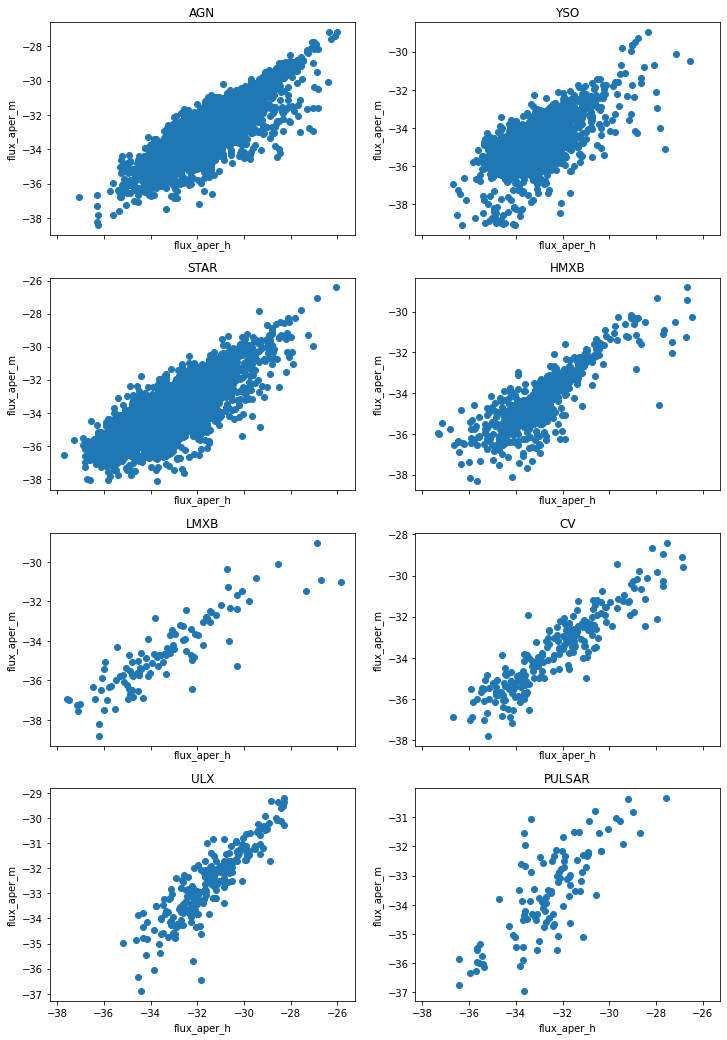

In [118]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['flux_aper_h' , 'flux_aper_m']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        if(len(to_plot)==1):
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
        else:
            ax[i][j].scatter(np.log(temp[to_plot[0]]) , np.log(temp[to_plot[1]]) , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
            ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


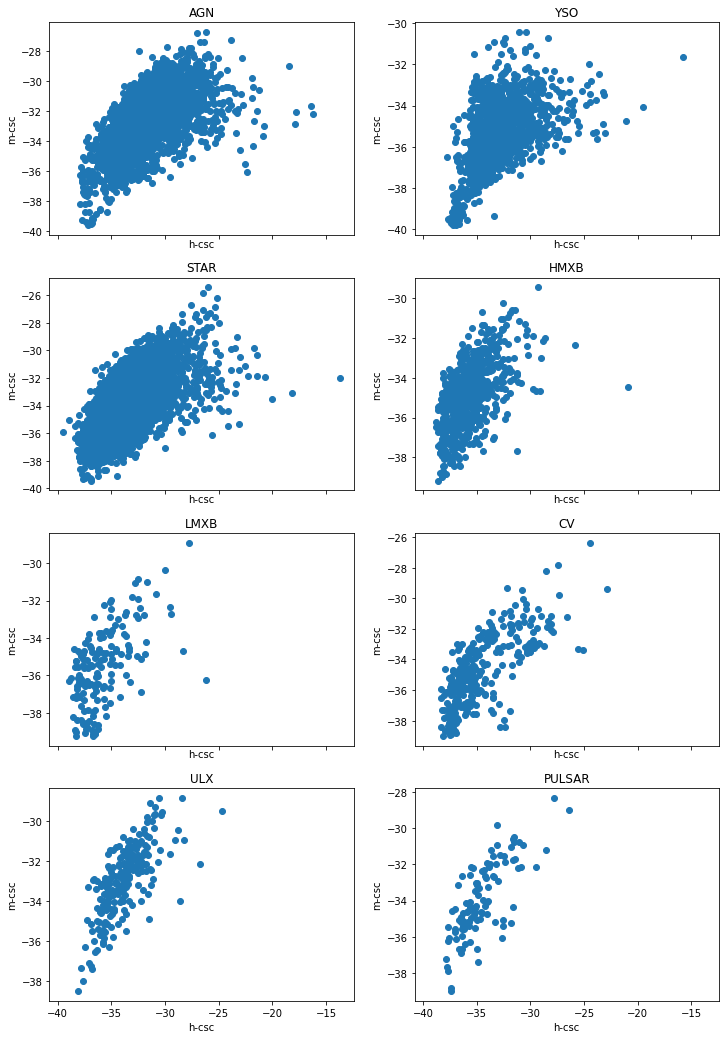

In [120]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['h-csc' , 'm-csc']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        if(len(to_plot)==1):
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
        else:
            ax[i][j].scatter(np.log(temp[to_plot[0]]) , np.log(temp[to_plot[1]]) , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
            ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


/home/kumaran/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


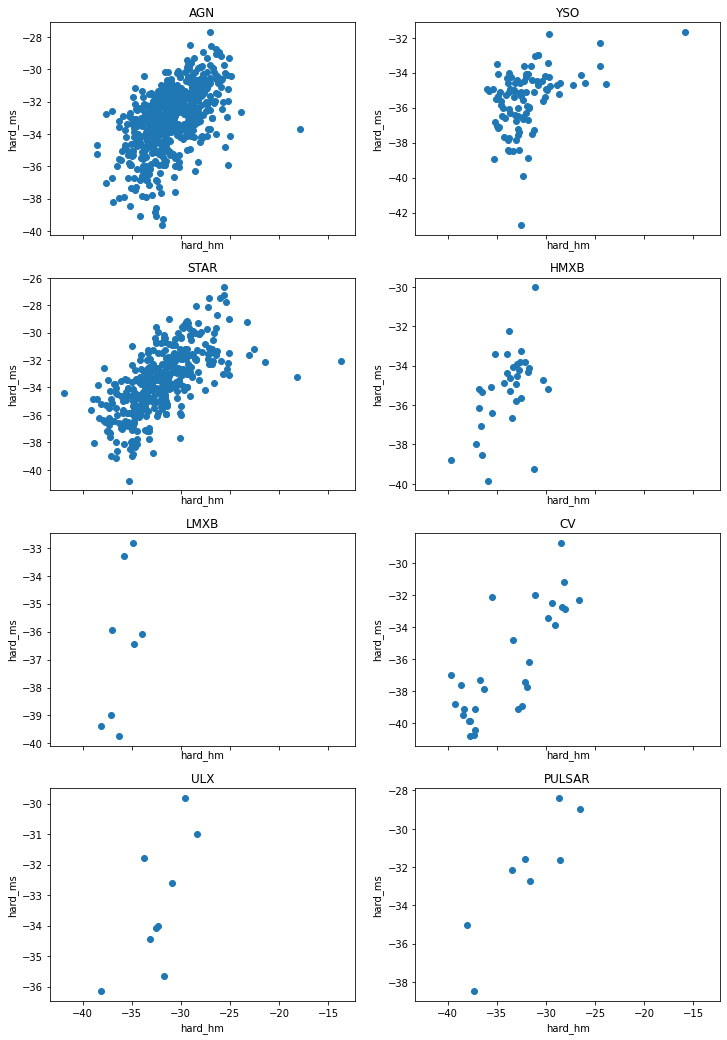

In [75]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        temp = temp[~temp['h-csc'].isna()]
        temp = temp[~temp['m-csc'].isna()]
        temp = temp[~temp['s-csc'].isna()]
        #temp = temp[~temp['h-csc'].isna()]
        x = temp['h-csc']-temp['m-csc']
        y = temp['m-csc']-temp['s-csc']
        #print(len(x) , len(y))
        ax[i][j].scatter(np.log(x),np.log(y) , label = cl[i][j])
        ax[i][j].set_xlabel(to_plot[0])
        ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


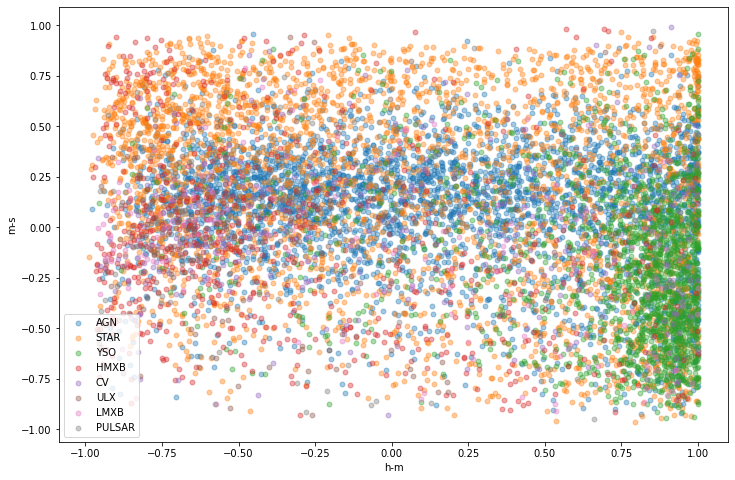

In [122]:
classes = ch['class'].value_counts().index.to_list()
nrows  , ncols = 1 , 1 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,8) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
#cl = np.reshape(classes, ax.shape)
df = ch.copy()
#classes = ['STAR' , 'AGN']
for cl in classes:
    temp = df[df['class']==cl]
    h = 'h-csc'
    m = 'm-csc'
    s = 's-csc'
    temp = temp[~temp[h].isna()]
    temp = temp[~temp[m].isna()]
    temp = temp[~temp[s].isna()]
    #temp = temp[~temp['h-csc'].isna()]
    x = (temp[h]-temp[m]) / (temp[h]+temp[m])
    y = (temp[m]-temp[s])/(temp[m]+temp[s])
    #print(len(x) , len(y))
    #x = temp['flux_aper_h']
    #y = temp['flux_aper_s']
    ax.scatter((x),(y) , label = cl , s=24 , alpha=0.4)
    #ax.scatter(temp['hard_hm'],temp['hard_ms'] , label = cl , s=10 , alpha=0.6)
    ax.set_xlabel('h-m')
    ax.set_ylabel('m-s')
    #ax.set_title(cl[i][j])
plt.legend()
plt.show()
